In [1]:
import os
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
#assumes trail files are stored in simData folder 
#and simData folder in current directory

%matplotlib inline

In [10]:
def states_to_pop(log_path): 
    # This function processes the data resulting from the simulation
    # which contain the states of each node at each timestep
    # It returns dataframes with information about the total population
    # at each timestep for each trial.

    files=os.listdir(log_path) #get all files current directory
    files = [f for f in files if 'trial' in f] #only keep files with 'trial' in them
    files.sort() #sorting
    zombies = pd.DataFrame(columns=range(10),index=range(500))
    humans = pd.DataFrame(columns=range(10),index=range(500))
    removed = pd.DataFrame(columns=range(10),index=range(500))
    num_trials = len(files)
    for k in range(num_trials):

        item = files[k]
        states=pd.DataFrame.from_csv(log_path+'/'+item) #This is the dataframe with all the states
        
        time_steps=(len(states.columns))#time steps at which we have recorded population
        a=range(time_steps)#makes a list with time intervals
        states.columns=a #relabels the columns so that they correspond to steps all integers
        humans[k] = (states == 0).sum()
        zombies[k] = (states == 1.0).sum()
        removed[k] = (states == 2.0).sum()
        
    return humans.T,zombies.T,removed.T
    

In [11]:
S,Z,R = states_to_pop('simData')

In [12]:
def plot_results(S,Z,R):
    #Given population data this function produces a plot with their
    #behaviour over time averaged over the number of trials.
    
    t = S.columns
    plt.plot(t,S.mean(),color='b',label='S')
    plt.fill_between(t,S.mean()-S.std(),S.mean()+S.std(),color='b',alpha=0.2)
    plt.plot(t,Z.mean(),color='r',label='Z')
    plt.fill_between(t,Z.mean()-Z.std(),Z.mean()+Z.std(),color='r',alpha=0.2)
    plt.plot(t,R.mean(),color='k',label='R')
    plt.fill_between(t,R.mean()-R.std(),R.mean()+R.std(),color='k',alpha=0.2)
    
    axis = plt.gca()
    axis.set_ylim([0,1000])
    axis.set_xlim([0,500])
    plt.legend()
    plt.xlabel('t',fontsize = 20)
    plt.ylabel('population', fontsize = 18)

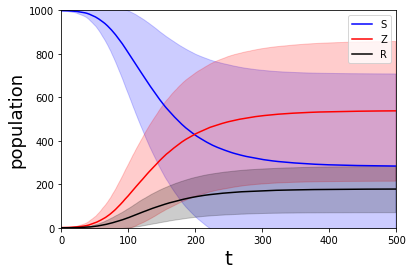

In [13]:
plot_results(S,Z,R)

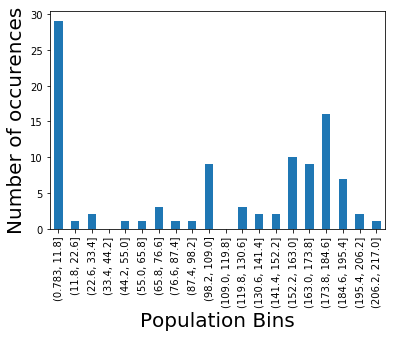

In [18]:
#Histogramming the distribution of the population over different trials
#for a specific point at time

a = pd.value_counts(R[150],bins = 20,sort=False)
a.plot(kind='bar')
plt.xlabel('Population Bins', fontsize = 20)
plt.ylabel('Number of occurences', fontsize = 20)